In [1]:
# import the necessary library 
# If you need any other library, you can write the import function here
!pip install xgboost


In [2]:
import numpy as np 
import pandas as pd 
        
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression

In [3]:
data= pd.read_csv('https://raw.githubusercontent.com/Mathuran-Mang/NBA-MVP-Prediction-Model/main/player_stats.csv')
data


,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,turnover_percentage,usage_percentage,offensive_win_shares,defensive_win_shares,win_shares,win_shares_per_48_minutes,offensive_box_plus_minus,defensive_box_plus_minus,box_plus_minus,value_over_replacement_player
0,1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,...,15.7,24.1,9.5,5.3,14.8,0.227,4.8,2.4,7.2,7.3
1,2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,...,13.3,30.3,7.3,5.2,12.5,0.213,5.7,1.9,7.6,6.8
2,3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,...,10.3,31.7,9.3,1.3,10.6,0.173,5.5,-1.6,3.9,4.4
3,4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,...,14.0,25.3,5.6,5.6,11.2,0.182,3.0,1.5,4.5,4.8
4,5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,...,19.7,17.0,5.9,2.9,8.9,0.148,1.4,-0.3,1.1,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,10,Rudy Gobert,28,UTA,0.0,8.0,1010,0.008,71,30.8,...,13.7,17.0,6.1,5.2,11.3,0.248,2.1,2.8,4.9,3.8
675,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,18.0,30.2,0.5,3.2,3.7,0.075,2.6,1.1,3.7,3.4
676,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,19.6,20.2,2.7,3.3,6.0,0.153,0.7,2.2,2.9,2.3
677,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,15.2,31.9,3.0,2.6,5.6,0.179,5.9,2.3,8.1,3.8


In [4]:
data = data.drop(['Rank', 'Age', 'Tm', 'First', 'Pts Won', 'WS/48', 'WS'], axis = 1)


In [ ]:
train_data = data[data['year']<=2020]
test_data = data[data['year']>=2021]

In [6]:
train_data_1980 = train_data.copy()
train_data_2000 =train_data[train_data['year']>=2000]
train_data_2010 =train_data[train_data['year']>=2010]

After trying different number of features and analyzing their correlation values, having the top 11 features seem to be giving us the best results.


In [7]:
top_corr_1980 = train_data_1980.corr()["Share"].abs().sort_values(ascending = False)
top_corr_2000 = train_data_2000.corr()["Share"].abs().sort_values(ascending = False)
top_corr_2010 = train_data_2010.corr()["Share"].abs().sort_values(ascending = False)


In [8]:
features_1980 = top_corr_1980[:11].index
features_2000 = top_corr_2000[:11].index
features_2010 = top_corr_2010[:11].index

In [40]:
features_1980[1:]

Index(['value_over_replacement_player', 'win_shares', 'box_plus_minus',
       'win_shares_per_48_minutes', 'player_efficiency_rating',
       'offensive_box_plus_minus', 'offensive_win_shares', 'PTS',
       'usage_percentage', 'W/L%'],
      dtype='object')

## Data Training


In [10]:
train_x_1980 = train_data_1980[features_1980[1:]]
train_y_1980 = train_data_1980[features_1980[0]]
train_x_2000 = train_data_2000[features_2000[1:]]
train_y_2000 = train_data_2000[features_2000[0]]
train_x_2010 = train_data_2010[features_2010[1:]]
train_y_2010 = train_data_2010[features_2010[0]]

test_x_1980 = test_data[features_1980[1:]]
test_y_1980 = test_data[features_1980[0]]
test_x_2000 = test_data[features_2000[1:]]
test_y_2000 = test_data[features_2000[0]]
test_x_2010 = test_data[features_2010[1:]]
test_y_2010 = test_data[features_2010[0]]

## Linear Regression


In [11]:
regr = LinearRegression()
regr.fit(train_x_1980, train_y_1980)
regr.fit(train_x_1980, train_y_1980)
lin_pred1980 = regr.predict(test_x_1980)
rmse = np.sqrt(MSE(test_y_1980, lin_pred1980))
print("RMSE : % f" %(rmse))

RMSE :  0.204880


In [12]:

regr = LinearRegression()
regr.fit(train_x_2000, train_y_2000)
regr.fit(train_x_2000, train_y_2000)
lin_pred2000 = regr.predict(test_x_2000)
rmse = np.sqrt(MSE(test_y_2000, lin_pred2000))
print("RMSE : % f" %(rmse))

RMSE :  0.194818


In [13]:

regr = LinearRegression()  
regr.fit(train_x_2010, train_y_2010)
lin_pred2010 = regr.predict(test_x_2010)
rmse = np.sqrt(MSE(test_y_2010, lin_pred2010))
print("RMSE : % f" %(rmse))

RMSE :  0.198908


## XGboost


In [14]:
xgb_r_1980 = xg.XGBRegressor(n_estimators = 1000)
xgb_r_1980.fit(train_x_1980, train_y_1980)
pred1980 = xgb_r_1980.predict(test_x_1980)
rmse = np.sqrt(MSE(test_y_1980, pred1980))
print("RMSE : % f" %(rmse))

RMSE :  0.216531


In [15]:

xgb_r_2000 = xg.XGBRegressor(n_estimators = 1000)
xgb_r_2000.fit(train_x_2000, train_y_2000)
pred2000 = xgb_r_2000.predict(test_x_2000)
rmse = np.sqrt(MSE(test_y_2000, pred2000))
print("RMSE : % f" %(rmse))

RMSE :  0.157136


In [16]:

xgb_r_2010 = xg.XGBRegressor(n_estimators = 1000)
xgb_r_2010.fit(train_x_2010, train_y_2010)
pred2010 = xgb_r_2010.predict(test_x_2010)
rmse = np.sqrt(MSE(test_y_2010, pred2010))
print("RMSE : % f" %(rmse))

RMSE :  0.115997


In [18]:
temp = test_data[["Player", "Share"]]

In [57]:
temp["pred1980"] = pred1980
temp["pred2000"] = pred2000
temp["pred2010"] = pred2010
temp["lin_pred1980"] = lin_pred1980
temp["lin_pred2000"] = lin_pred2000
temp["lin_pred2010"] = lin_pred2010

temp

C:\Users\Por Zhang\AppData\Local\Temp\ipykernel_9676\3421008823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pred1980"] = pred1980
C:\Users\Por Zhang\AppData\Local\Temp\ipykernel_9676\3421008823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["pred2000"] = pred2000
C:\Users\Por Zhang\AppData\Local\Temp\ipykernel_9676\3421008823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,Player,Share,pred2010,pred1980,pred2000,lin_pred1980,lin_pred2000,lin_pred2010
666,Nikola Jokić,0.961,0.997603,0.640032,0.804646,0.420199,0.498436,0.485415
667,Joel Embiid,0.580,0.383227,0.078977,0.168019,0.280415,0.246235,0.314426
668,Stephen Curry,0.449,0.313701,0.290415,0.218699,0.208684,0.201307,0.209690
669,Giannis Antetokounmpo,0.345,0.233490,0.212240,0.436193,0.263714,0.275538,0.233150
670,Chris Paul,0.138,0.004318,0.054841,0.007118,0.070002,0.021412,-0.027901
671,Luka Dončić,0.042,0.185866,0.480300,0.096062,0.176018,0.199369,0.199576
672,Damian Lillard,0.038,0.193774,0.099843,0.053598,0.179099,0.137996,0.090501
673,Julius Randle,0.020,0.159599,0.102212,-0.000527,0.072194,-0.011174,0.063316
674,Rudy Gobert,0.008,0.031543,0.056029,0.146065,0.144076,0.062652,0.038915
675,Russell Westbrook,0.005,0.013278,0.019364,0.004959,-0.072631,-0.097352,-0.159775


In [23]:
test_y_1980

666    0.961
667    0.580
668    0.449
669    0.345
670    0.138
671    0.042
672    0.038
673    0.020
674    0.008
675    0.005
676    0.003
677    0.001
678    0.001
Name: Share, dtype: float64

In [24]:
pred1980

array([0.64003205, 0.07897741, 0.29041526, 0.21224023, 0.05484129,
       0.4802996 , 0.09984305, 0.10221227, 0.05602938, 0.01936402,
       0.00915666, 0.015196  , 0.01936756], dtype=float32)

In [25]:
pred2010


array([0.9976028 , 0.38322684, 0.31370062, 0.23348995, 0.00431792,
       0.18586592, 0.19377361, 0.15959862, 0.03154274, 0.01327794,
       0.0043678 , 0.12645501, 0.07472263], dtype=float32)

In [26]:
pred2000


array([ 8.0464602e-01,  1.6801867e-01,  2.1869901e-01,  4.3619305e-01,
        7.1181082e-03,  9.6061639e-02,  5.3598199e-02, -5.2651105e-04,
        1.4606506e-01,  4.9589588e-03,  1.3786319e-01,  3.6210593e-02,
        8.0079041e-02], dtype=float32)

In [27]:
test_data[["Player", "Share"]]

,Player,Share
666,Nikola Jokić,0.961
667,Joel Embiid,0.580
668,Stephen Curry,0.449
669,Giannis Antetokounmpo,0.345
670,Chris Paul,0.138
671,Luka Dončić,0.042
672,Damian Lillard,0.038
673,Julius Randle,0.020
674,Rudy Gobert,0.008
675,Russell Westbrook,0.005


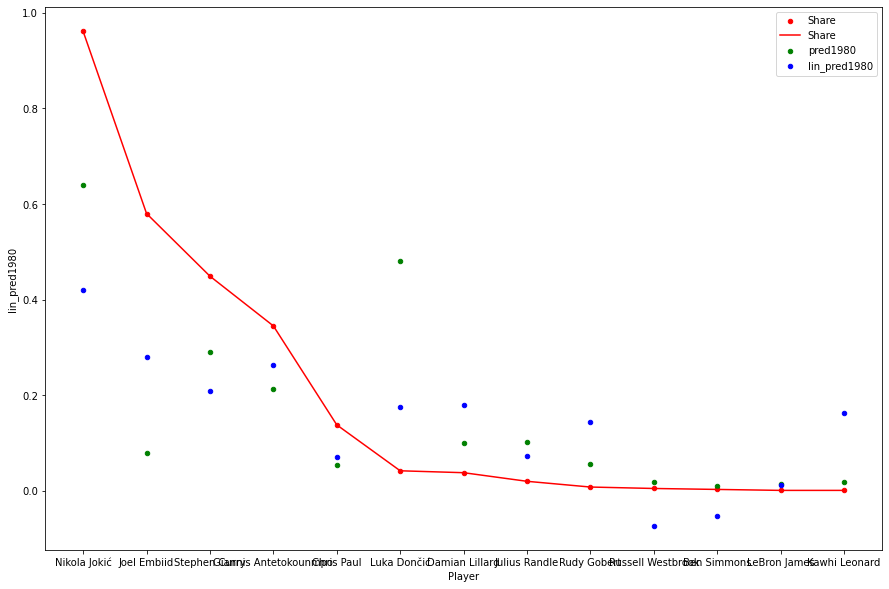

In [53]:
ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share', color = 'red', ax=ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred1980',color = 'green', ax= ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'lin_pred1980', color = 'blue', ax=ax1)
plt.legend(["Share","Share","pred1980","lin_pred1980"])

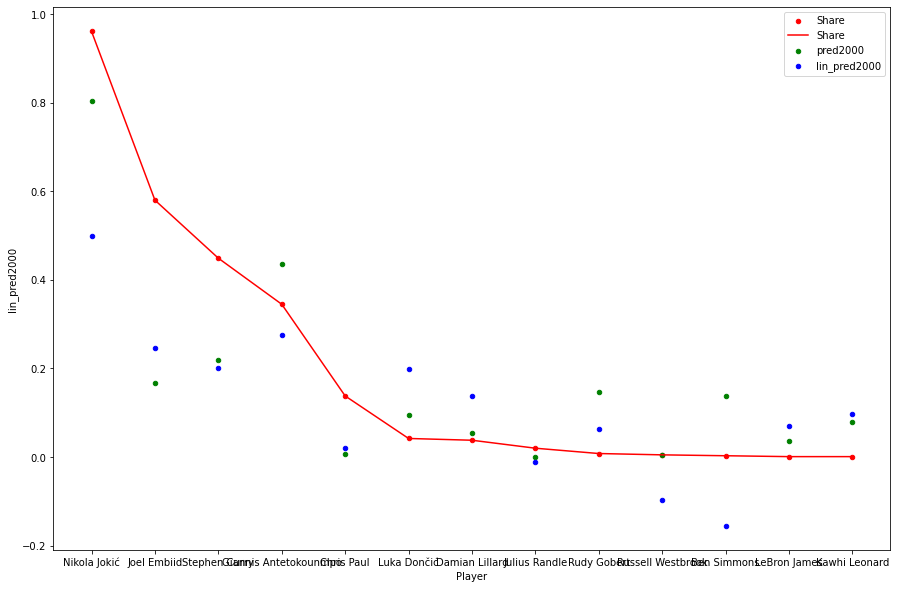

In [55]:
ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share', color = 'red', ax=ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2000',color = 'green', ax= ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'lin_pred2000', color = 'blue', ax=ax1)
plt.legend(["Share","Share","pred2000","lin_pred2000"])

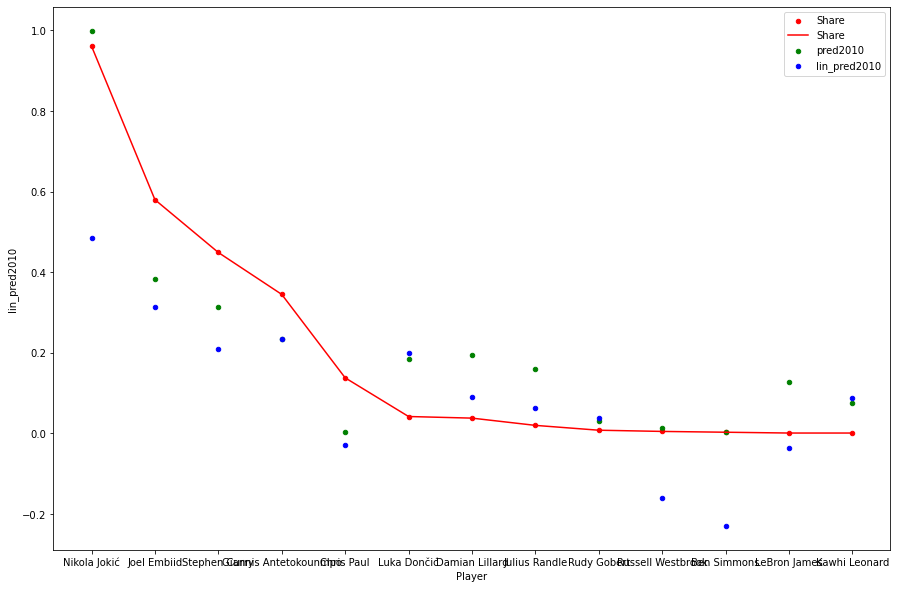

In [56]:
ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share', color = 'red', ax=ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2010',color = 'green', ax= ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'lin_pred2010', color = 'blue', ax=ax1)
plt.legend(["Share","Share","pred2010","lin_pred2010"])

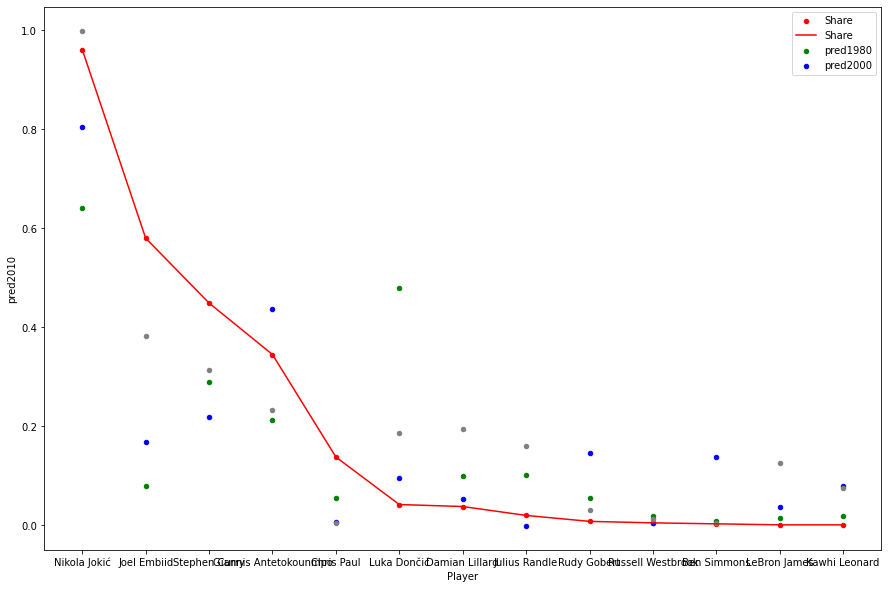

In [58]:
plt.rcParams["figure.figsize"] = (15,10)

ax1 = temp.plot(kind = 'scatter', x = 'Player', y = 'Share', color = 'red')
ax11 = temp.plot(kind = 'line', x = 'Player', y = 'Share',color = 'red', ax= ax1)
ax2 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred1980', color = 'green', ax=ax1)
ax3 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2000', color = 'blue',ax=ax1)
ax4 = temp.plot(kind = 'scatter', x = 'Player', y = 'pred2010', color = 'grey',ax=ax1)
plt.legend(["Share","Share","pred1980","pred2000"])

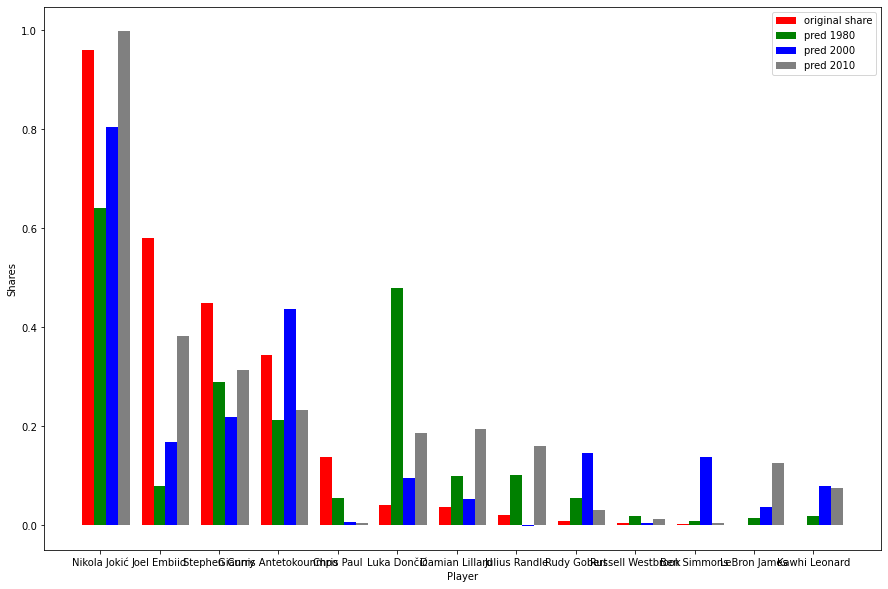

In [47]:
barwidth = 0.20
br1 = np.arange(len(temp['Player']))
br2 = [x + barwidth for x in br1]
br3 = [x + barwidth for x in br2]
br4 = [x + barwidth for x in br3]

plt.bar(br1,temp['Share'],color = 'r', width = barwidth, label = "original share")
plt.bar(br2,temp['pred1980'],color = 'g', width = barwidth, label = "pred 1980")
plt.bar(br3,temp['pred2000'],color = 'b', width = barwidth, label = "pred 2000")
plt.bar(br4,temp['pred2010'],color = 'grey', width = barwidth, label = "pred 2010")

plt.xlabel("Player")
plt.ylabel("Shares")

plt.xticks([r + barwidth for r in range(len(temp))],
           list(temp['Player']))
plt.legend()

The model we prefer to use in the dataset is XGboost than linear regression because XGboost generally fit training data much better than linear regression. And after generating the root mean square deviation, we found out in 2010 has the lowest root mean square deviation, thus it is better than the other 1980 and 2000.

From the first three scatter plots, we are trying to find which model will have the best fit to the base model. As result, XGboost is the best model. 

In the last scatter plot, we used XGboost to identify which year will have the best fit for us to predict the MVP. As result, pred2010 has the best fit for use to predict for the dataset.
